In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import ndimage, signal, dot
import colorsys
from os import path
from math import sqrt

In [2]:
def get_HSV_arrays(image):
    '''
    Returns a numpy array of hues, saturations, and values
    @params image ndarray of the image

    @returns
    hues ndarray of hues
    sats ndarray of saturations
    values ndarray of values
    colors list of RGB colors (for coloring scatter plots)
    '''
    colors = [] #to hold the RGB tuples
    hues = [] #to hold the hues
    sats = [] #to hold the saturations
    values = [] #to hold the values
    #iterate through each pixel in the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            [r, g, b] = image[y, x]
            #normalize the RGB values to between 0 - 1
            r /= 255.0
            g /= 255.0
            b /= 255.0
            #append the normalized RGB to colors
            colors.append([r, g, b])
            #convert the normalized RGB to HSV values
            [h, s, v] = colorsys.rgb_to_hsv(r, g, b)
            #append the hues, saturation, and value into separate arrays
            hues.append(h)
            sats.append(s)
            values.append(v)
    #convert the lists into ndarrays
    hues = np.array(hues)
    sats = np.array(sats)
    values = np.array(values)

    return hues, sats, values, colors

In [5]:
#Prompt the user to enter the name of the file
#image should be in the same directory
image_name = raw_input("Enter the name of the image file: ")
image_path = path.join("./", image_name)
image = ndimage.imread(image_path)

Enter the name of the image file: starry1.jpg


/Users/Alice/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """


In [6]:
#zoom the image if total pixel is over 400000
#to avoid slow computation
if image.shape[0]*image.shape[1] > 40000:
    scale = sqrt(40000.0 / (image.shape[0] * image.shape[1]))
    image = ndimage.interpolation.zoom(image, (scale, scale, 1))
    #image is now a square matrix of 200, 200, 3

#get arrays for plotting the graphs
hues, sats, values, colors = get_HSV_arrays(image)

/Users/Alice/anaconda2/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


Text(0,0.5,u'Frequency')

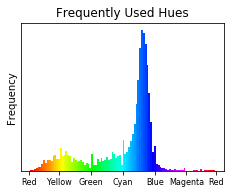

In [7]:
fig = plt.figure(image_name, figsize=(8,6))
#plot a histogram for most frequently used hues
plt.subplot(2,2,1)
plt.title("Frequently Used Hues")
#mask any zeroes in hues
nonzero_hues = np.ma.masked_where(hues == 0.0, hues)
#N is an array that stores the values for each bin
N, bins, patches = plt.hist(nonzero_hues, bins=100)
#Create a list of bar colors
#Color each bar in the histogram by the corresponding hue
bar_colors = []
spectrum = np.linspace(0,1,100)
for color in spectrum:
    [r, g, b] = colorsys.hsv_to_rgb(color, 1, 1)
    bar_colors.append([r, g, b])
for i in range(len(bins) - 1):
    patches[i].set_facecolor(bar_colors[i])
plt.xticks([0.0, 0.16, 0.33, 0.5, 0.67, 0.84, 1.0],
           ['Red', 'Yellow', 'Green', 'Cyan', 'Blue', 'Magenta', 'Red'], fontsize=8)
plt.yticks([])

plt.ylabel("Frequency")

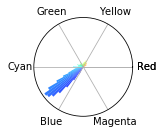

In [8]:
#plot a radial histogram
ax = plt.subplot(2,2,2, polar=True)
theta = np.linspace(0.0, 2 * np.pi, 100, endpoint=False)
width = (2*np.pi) / N.size
bars = ax.bar(theta, N, width=width, bottom=4)
for i, bar in enumerate(bars):
    bar.set_facecolor(bar_colors[i])
    bar.set_alpha(0.8)
plt.xticks(np.linspace(0.0, 2*np.pi, 7),
           ['Red', 'Yellow', 'Green', 'Cyan', 'Blue', 'Magenta', 'Red'])
plt.yticks([])
ax.yaxis.grid(False)

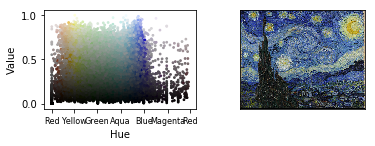

In [9]:
#plot a scatter plot of hue vs. value
plt.subplot(2,2,3)
plt.scatter(hues, values, s=3, c=colors)
plt.xlabel('Hue')
plt.xticks([0.0, 0.16, 0.33, 0.5, 0.67, 0.84, 1.0],
           ['Red', 'Yellow', 'Green', 'Aqua', 'Blue', 'Magenta', 'Red'], fontsize=8)
plt.ylabel('Value')

#display the image
plt.subplot(2,2,4)
plt.imshow(image)
plt.xticks([])
plt.yticks([])
#plt.tight_layout()
plt.show()

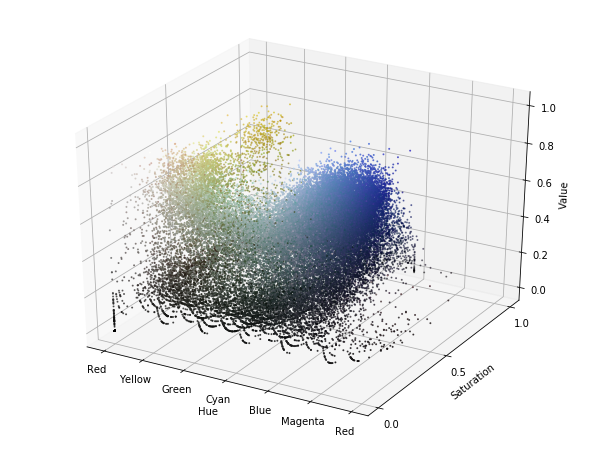

In [10]:
#second figure: plot a 3D scatter plot of HSV
fig2 = plt.figure(image_name, figsize=(8,6))
plt.title("3D Scatter Plot of HSV")
ax2 = Axes3D(fig2)
ax2.scatter(hues, sats, values, s=1, c=colors)
ax2.set_xlabel('Hue')
plt.xticks([0.0, 0.16, 0.33, 0.5, 0.67, 0.84, 1.0],
            ['Red', 'Yellow', 'Green', 'Cyan', 'Blue', 'Magenta', 'Red'])
ax2.set_ylabel('Saturation')
plt.yticks([0.0, 0.5, 1.0])
ax2.set_zlabel('Value')
plt.show()

Image taken from https://commons.wikimedia.org/wiki/File:Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg
Starry Night by Vincent Van Gogh